# Assignment

## Instructions



### Task: Building a Neural Network for Wine Classification

In this assignment, you will build and train a neural network using PyTorch to classify wine varieties based on their chemical attributes. You will use the Wine dataset, a classic machine learning dataset that contains the results of chemical analyses of wines grown in the same region in Italy but derived from three different cultivars.

#### Dataset

The Wine dataset consists of 13 features:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

The target variable is the class of wine (1, 2, or 3).

#### Requirements

1. Load the Wine dataset from scikit-learn
2. Preprocess the data (standardize features)
3. Split the data into training and testing sets
4. Build a multi-layer neural network using PyTorch with:
   - An input layer (matching the number of features)
   - At least one hidden layer with ReLU activation
   - An output layer with appropriate activation for classification
5. Train your model using an appropriate loss function and optimizer
6. Evaluate your model's performance on the test set
7. Experiment with different network architectures or hyperparameters to improve performance

#### Starter Code

In [111]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)



### Approach 0

In [120]:
# import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# for reproducibility
import random; random.seed(42); np.random.seed(42); torch.manual_seed(42)

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

print('Dataset Structure:')
print(f'X_train Shape: {X_train_tensor.shape}')
print(f'Features Names: {wine.feature_names}')
print(f'Number of Classes: {len(torch.unique(y_train_tensor))}')

Dataset Structure:
X_train Shape: torch.Size([142, 13])
Features Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Number of Classes: 3


In [121]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor,  y_test_tensor)

BATCH_SIZE = 32  # change accordingly
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=BATCH_SIZE, shuffle=False)

class WineClassifier(nn.Module):
    def __init__(self, in_features: int, num_classes: int, hidden1: int = 64, hidden2: int = 32):
        super().__init__()
        self.fc1   = nn.Linear(in_features, hidden1)   # 13 → 64
        self.relu1 = nn.ReLU()
        self.fc2   = nn.Linear(hidden1, hidden2)       # 64 → 32
        self.relu2 = nn.ReLU()
        self.fc3   = nn.Linear(hidden2, num_classes)   # 32 → 3

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)    # logits
        return x
    
# Instantiate model
model = WineClassifier(in_features=X_train.shape[1], num_classes=3, hidden1=64, hidden2=32)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


Epoch   0/100  Loss: 0.000000
Epoch  10/100  Loss: 0.000000
Epoch  20/100  Loss: 0.000000
Epoch  30/100  Loss: 0.000000
Epoch  40/100  Loss: 0.000000
Epoch  50/100  Loss: 0.000000
Epoch  60/100  Loss: 0.000000
Epoch  70/100  Loss: 0.000000
Epoch  80/100  Loss: 0.000000
Epoch  90/100  Loss: 0.000000


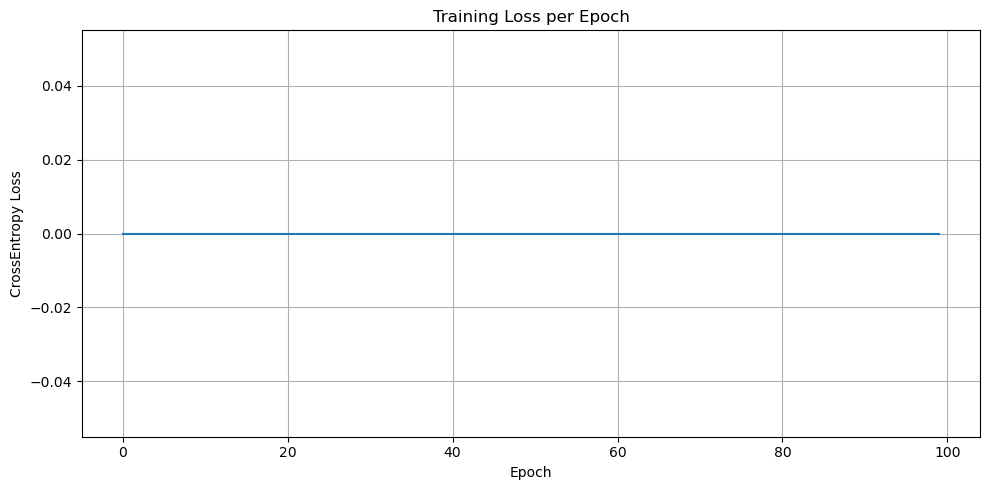

In [135]:
# training Loop (mini-batch)
num_epochs = 100
epoch_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss, seen = 0.0, 0
    for xb, yb in train_loader:
        logits = model(xb)
        loss = criterion(logits, yb)     # batch mean
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * yb.size(0)  # accumulate sum
        seen += yb.size(0)

    epoch_mean = epoch_loss / seen
    epoch_losses.append(epoch_mean)
    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d}/{num_epochs}  Loss: {epoch_mean:.6f}")

plt.figure(figsize=(10, 5))
plt.plot(epoch_losses)
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('CrossEntropy Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [125]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        preds = model(xb).argmax(1)
        y_true.append(yb.numpy())
        y_pred.append(preds.numpy())
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

acc = accuracy_score(y_true, y_pred)
cm  = confusion_matrix(y_true, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=wine.target_names))

Test Accuracy: 1.0000
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Method 1:

In [110]:
# import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [66]:
# Load Dataset
wine = load_wine(as_frame=True)
wine_data = wine.frame

print(f'Dataset Overview:')
print(f'Dataset Shape: {wine_data.shape}')
print(f'Features: {wine.feature_names}')
print(f'Number of Classes: {wine_data.target.nunique()}')

# Display basic dataset information
print(f'\nDataset Info:')
print(wine_data.info())

# Display first few rows
print("First 5 rows of the dataset:")
print(wine_data.head())

Dataset Overview:
Dataset Shape: (178, 14)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Number of Classes: 3

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   p

In [67]:
# Split features and target
X = wine_data.drop('target', axis=1)
y = wine_data['target']

print(f'Features (X) Shape: {X.shape}')
print(f'Target (y) Shape: {y.shape}')
print(f'Number of Classes: {len(np.unique(y))}')
print('Target value counts:')
print(y.value_counts())

# Check for missing values
print("Missing values in the dataset:")
missing_values = wine_data.isnull().sum()
missing_percentage = wine_data.isnull().sum() / len(wine_data) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0])

Features (X) Shape: (178, 13)
Target (y) Shape: (178,)
Number of Classes: 3
Target value counts:
target
1    71
0    59
2    48
Name: count, dtype: int64
Missing values in the dataset:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


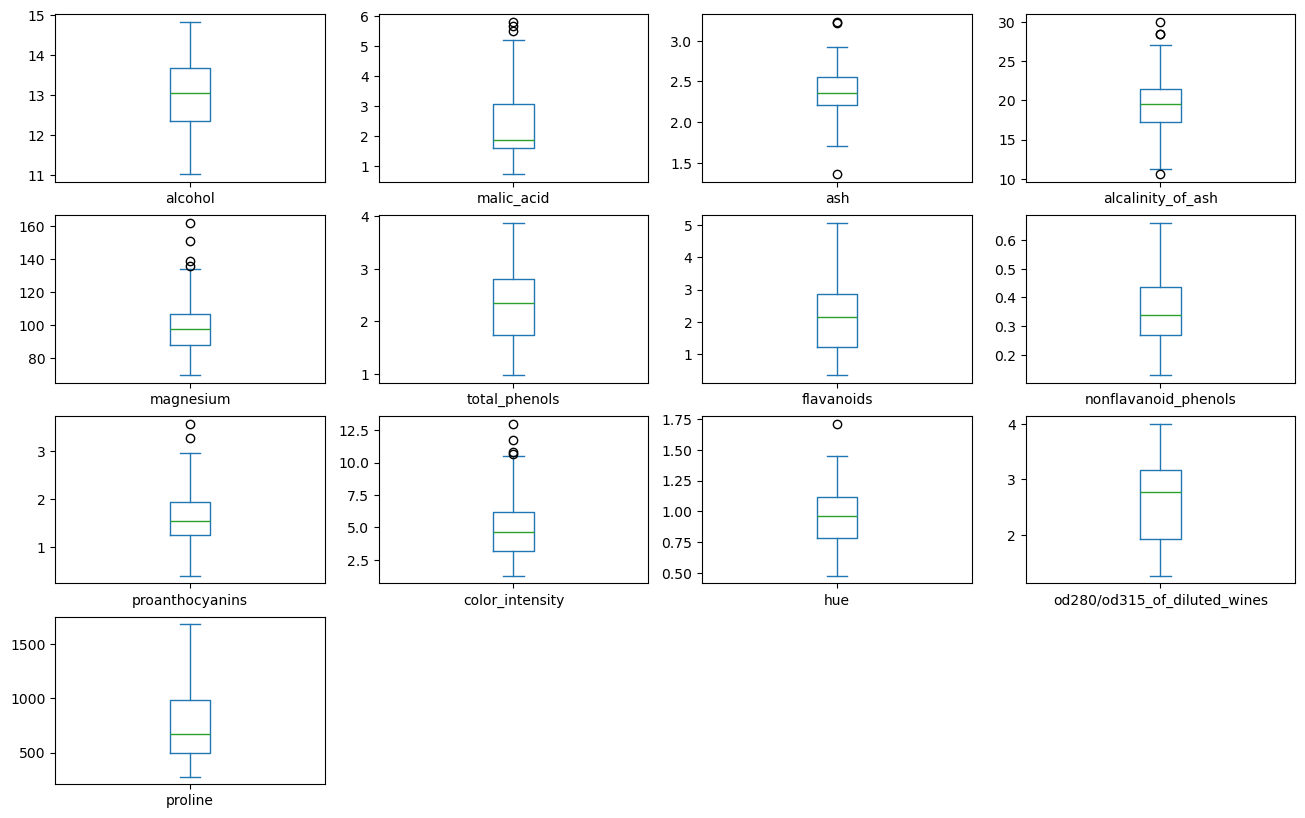

In [68]:
# Basic EDA

wine_num = wine_data.drop('target', axis=1).copy()
wine_num.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16, 10))
plt.show()

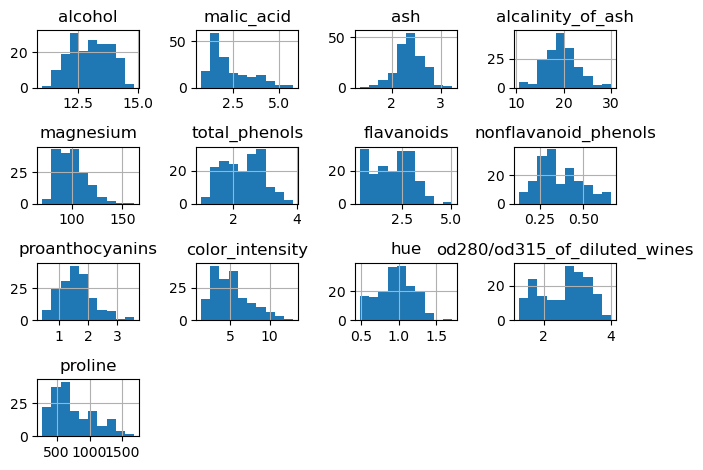

In [69]:
figsize=(16, 10)
wine_num.hist()
plt.tight_layout()
plt.show()

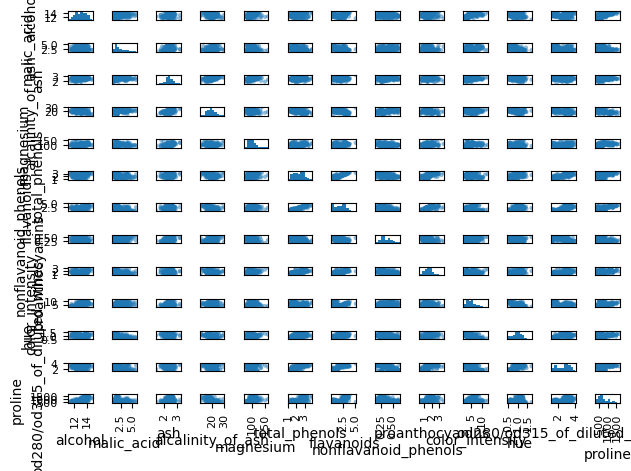

In [70]:
# Multivariate Plots

figsize=(25, 20)
pd.plotting.scatter_matrix(wine_num)
plt.tight_layout()
plt.show()

In [72]:
# Preprocess Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train.values)  #  y is a panda series
y_test_tensor = torch.LongTensor(y_test.values)

> - `torch.FloatTensor`: Tensor used to store floating-point numbers, for input features 
> - `torch.LongTensor`: Tensor used to store integer numbers (whole numbers) with higher precision, for labels

Data Processing Output:

- Features (X) Shape: (178, 13): 178 samples, 13 input features
- Number of Classes: 3

NN Structure:
- Input Layer: 13 input features
- Hidden Layer 1: 64 neurons with ReLu Activation
- Hidden Layer 2: 32 neurons with ReLu Activation
- Output Layer: 3 classes with softmax activation 

In [112]:
# Define your neural network
class WineClassifierNet(nn.Module):
    def __init__ (self, input_size, hidden_size1, hidden_size2, num_classes):
        super(WineClassifierNet, self).__init__()
        # First hidden layer
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()

        # Second Hidden Layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()

        # Output Layer
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x



In [113]:
# Initialize the network
input_size = X_train.shape[1] # Number of features
hidden_size1 = 64
hidden_size2 = 32
num_classes = 13              # Number of classes

model = WineClassifierNet(input_size, hidden_size1, hidden_size2, num_classes)
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

WineClassifierNet(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=13, bias=True)
)


Epoch [100/1000], Loss: 0.0949
Epoch [200/1000], Loss: 0.0169
Epoch [300/1000], Loss: 0.0063
Epoch [400/1000], Loss: 0.0032
Epoch [500/1000], Loss: 0.0019
Epoch [600/1000], Loss: 0.0013
Epoch [700/1000], Loss: 0.0009
Epoch [800/1000], Loss: 0.0007
Epoch [900/1000], Loss: 0.0005
Epoch [1000/1000], Loss: 0.0004


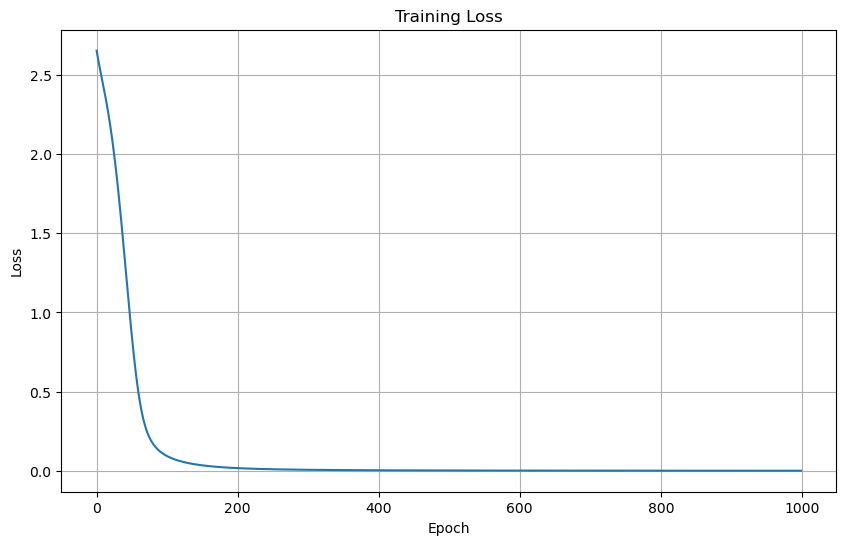

In [97]:
# Implement training loop - Simplified
epochs = 1000
losses = []

for epoch in range(epochs):
        
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [95]:
# Evaluate the model on test data
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())
    conf_matrix = confusion_matrix(y_test, predicted.numpy())

    print(f'Test Accuracy: {accuracy:.4f}')
    print('\nConfusion Matrix:')
    print(conf_matrix)
    print('\nClassification Report:')
    print(classification_report(y_test, predicted.numpy(), target_names=wine.target_names))


Test Accuracy: 1.0000

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Method 2: - preferred

In [160]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

print('Dataset Structure:')
print(f'X_train Shape: {X_train_tensor.shape}')
print(f'Feature names: {wine.feature_names}')
print(f'Number of Classes: {len(torch.unique(y_train_tensor))}')

Dataset Structure:
X_train Shape: torch.Size([142, 13])
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Number of Classes: 3


**Build Multi-Class Neural Network**

- 13 input features
- 2 hidden layers (32, 16 neurons respectively)


In [169]:
# Define Model Architecture using Sequential
# Define model
class WineClassifier(nn.Module):
    def __init__(self, in_features: int, h1: int = 32, h2: int = 16, num_classes: int = 3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, h1),
            nn.ReLU(),
            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.Linear(h2, num_classes)  # logits
        )
    def forward(self, x):
        return self.net(x)
    
model = WineClassifier(in_features=X_train_tensor.shape[1])

print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # output needs to be a probability distribution, internally applies the softmax function, for multi-class classification

optimizer = optim.Adam(model.parameters(), lr=0.001)


WineClassifier(
  (net): Sequential(
    (0): Linear(in_features=13, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=3, bias=True)
  )
)


Epoch [10/100], Loss: 1.0749, Validation Loss: 1.0660
Epoch [20/100], Loss: 1.0237, Validation Loss: 1.0162
Epoch [30/100], Loss: 0.9586, Validation Loss: 0.9538
Epoch [40/100], Loss: 0.8735, Validation Loss: 0.8664
Epoch [50/100], Loss: 0.7714, Validation Loss: 0.7580
Epoch [60/100], Loss: 0.6595, Validation Loss: 0.6396
Epoch [70/100], Loss: 0.5437, Validation Loss: 0.5212
Epoch [80/100], Loss: 0.4277, Validation Loss: 0.4073
Epoch [90/100], Loss: 0.3211, Validation Loss: 0.3064
Epoch [100/100], Loss: 0.2351, Validation Loss: 0.2264


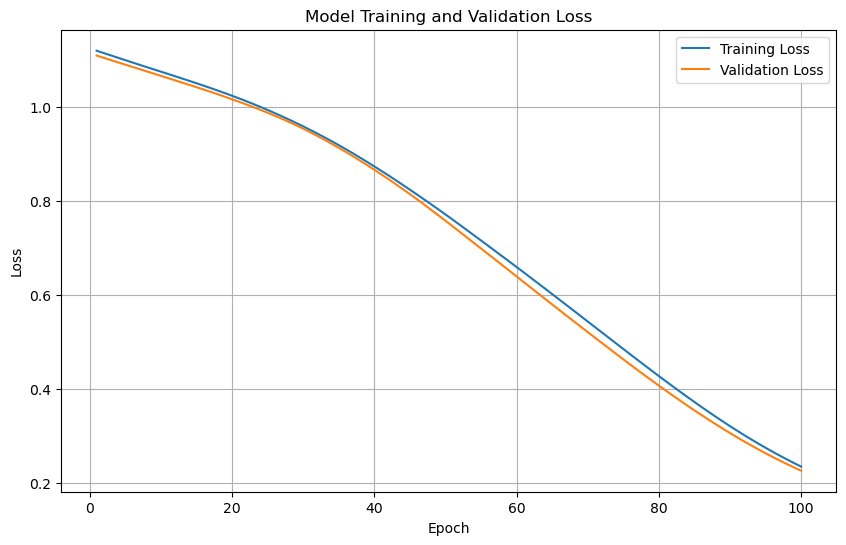

In [168]:
# Train the model
num_epochs = 100
history = {'loss': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())

    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test_tensor)
        val_loss = criterion(outputs_val, y_test_tensor)  
        history['val_loss'].append(val_loss.item())
        
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plotting the Training History
epochs_list = range(1, len(history['loss']) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_list, history['loss'], label='Training Loss')
plt.plot(epochs_list, history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
# Model Evaluation 
model.eval()
with torch.no_grad():
    outputs_val = model(X_test_tensor)
    _, predicted = torch.max(outputs_val, 1)
    accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
    conf_matrix = confusion_matrix(y_test_tensor.numpy(), predicted.numpy())

print('Test Set Evaluation:')
print(f'Test Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, predicted.numpy(), target_names=wine.target_names))


Test Set Evaluation:
Test Accuracy: 1.0000

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



color_intensity            importance=0.085718
ash                        importance=0.085272
alcalinity_of_ash          importance=0.082847
proanthocyanins            importance=0.081552
alcohol                    importance=0.078943
magnesium                  importance=0.077628
malic_acid                 importance=0.076713
hue                        importance=0.074167
flavanoids                 importance=0.073934
od280/od315_of_diluted_wines  importance=0.073680
total_phenols              importance=0.072025
proline                    importance=0.069162
nonflavanoid_phenols       importance=0.068360


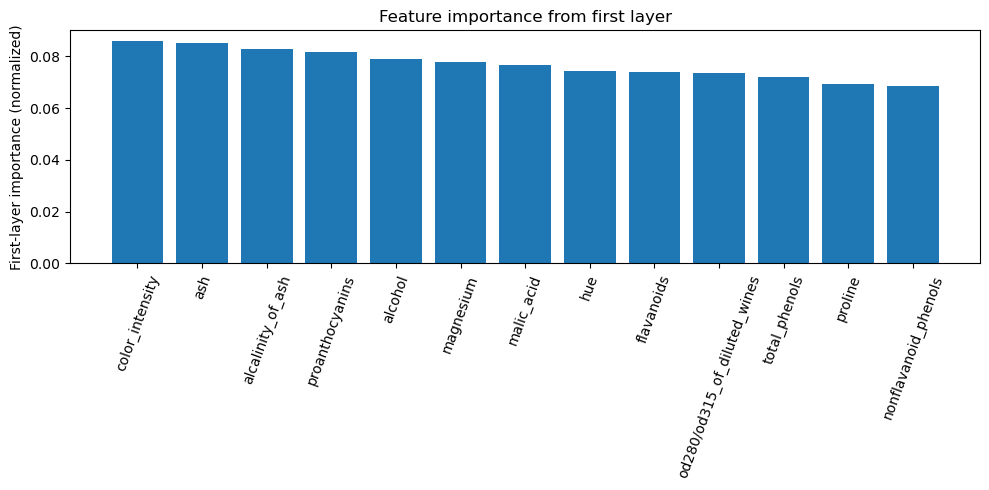

In [173]:
# Visualize Feature Importance
# Get first-layer weights (works for either explicit fc1 or Sequential net[0])
def get_first_layer(module):
    if hasattr(module, "fc1"):
        return module.fc1  # explicit by-layer model
    if hasattr(module, "net") and isinstance(module.net[0], torch.nn.Linear):
        return module.net[0]  # Sequential model with first layer at index 0
    raise AttributeError("Cannot locate first Linear layer (fc1 or net[0]).")

first = get_first_layer(model)                 # model must be trained
W = first.weight.detach()                      # shape: [hidden_units, n_features]
importances = W.abs().mean(dim=0).cpu().numpy()  # shape: [n_features]

# normalize
importances_norm = importances / importances.sum()

# feature names
try:
    feature_names = wine.feature_names
except:
    feature_names = [f"feat_{i}" for i in range(importances.shape[0])]

# sort and print
order = np.argsort(importances_norm)[::-1]
for i in order:
    print(f"{feature_names[i]:<25s}  importance={importances_norm[i]:.6f}")

# Plot (top-k optional)
topk = len(feature_names)  # or e.g., 10
kidx = order[:topk]
plt.figure(figsize=(10, 5))
plt.bar([feature_names[i] for i in kidx], importances_norm[kidx])
plt.xticks(rotation=70)
plt.ylabel("First-layer importance (normalized)")
plt.title("Feature importance from first layer")
plt.tight_layout()
plt.show()

In [176]:
def _first_linear(model: nn.Module) -> nn.Linear:
    for m in model.modules():
        if isinstance(m, nn.Linear):
            return m
    raise ValueError("No nn.Linear layer found in model.")

def show_first_layer_importance(model: nn.Module, feature_names=None, top_k=None, normalize=True):
    first = _first_linear(model)
    imp = first.weight.detach().abs().mean(dim=0).cpu().numpy()  # |W| mean over hidden units

    if normalize:
        s = imp.sum()
        if s > 0:
            imp = imp / s

    if feature_names is None:
        try:
            feature_names = wine.feature_names  # falls back to Wine names if available
        except Exception:
            feature_names = [f"feat_{i}" for i in range(len(imp))]

    order = np.argsort(imp)[::-1]
    if top_k is not None:
        order = order[:top_k]

    names = [feature_names[i] for i in order]
    vals  = imp[order]

    plt.figure(figsize=(10, 5))
    plt.bar(names, vals)
    plt.xticks(rotation=70)
    plt.ylabel("First-layer |W| mean" + (" (normalized)" if normalize else ""))
    plt.title("First-layer feature importance")
    plt.tight_layout()
    plt.show()

    return dict(zip(names, vals))  # also return the sorted importances

# Usage:
# show_first_layer_importance(model)                 # auto-uses wine.feature_names if present
# show_first_layer_importance(model, top_k=10)       # show top 10
# show_first_layer_importance(model, feature_names=my_names, normalize=False)

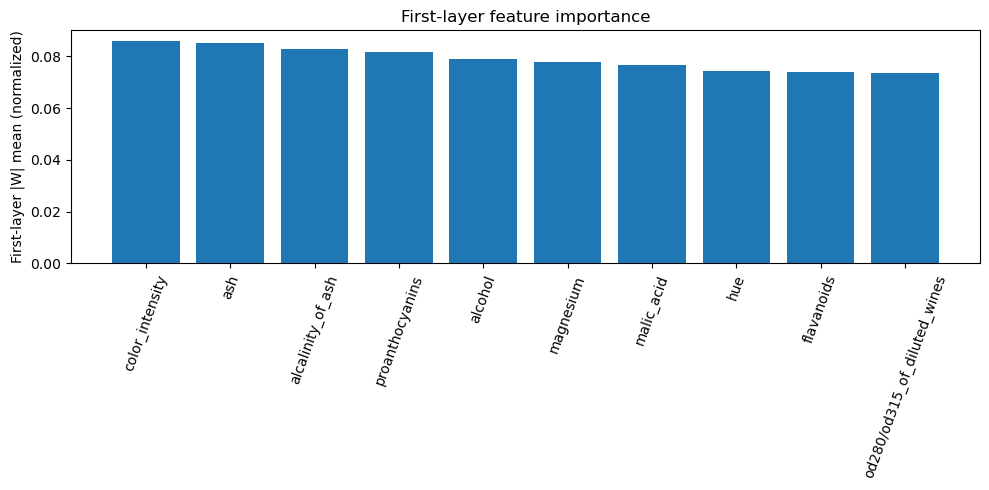

{'color_intensity': 0.085718,
 'ash': 0.08527171,
 'alcalinity_of_ash': 0.0828469,
 'proanthocyanins': 0.08155232,
 'alcohol': 0.07894281,
 'magnesium': 0.077628,
 'malic_acid': 0.07671266,
 'hue': 0.07416679,
 'flavanoids': 0.073934495,
 'od280/od315_of_diluted_wines': 0.073679835}

In [177]:
show_first_layer_importance(model, top_k=10) 

In [178]:
# Save the model
torch.save(model.state_dict(), 'wine_classifier.pth')
print("Model saved to 'wine_classifier.pth'")

Model saved to 'wine_classifier.pth'


In [ ]:
# Example of using the model for prediction
def predict_wine(features):
    # Scale the features using the same scaler
    scaled_features = scaler.transform([features])

    # Convert to tensor
    features_tensor = torch.FloatTensor(scaled_features)

    # Get prediction
    model.eval()
    with torch.no_grad():
        outputs = model(features_tensor)
        _, predicted = torch.max(outputs, 1)

    return wine.target_names[predicted.item()]

# Example usage:
sample_features = X_test[-1]  # Using the last test sample
predicted_wine = predict_wine(sample_features)
actual_wine = wine.target_names[y_test[0]]

print(f"Sample features: {sample_features}")
print(f"Predicted wine type: {predicted_wine}")
print(f"Actual wine type: {actual_wine}")

Sample features: [1.388e+01 1.890e+00 2.590e+00 1.500e+01 1.010e+02 3.250e+00 3.560e+00
 1.700e-01 1.700e+00 5.430e+00 8.800e-01 3.560e+00 1.095e+03]
Predicted wine type: class_2
Actual wine type: class_0


#### Tuning

**Different Activation Functions**

- ReLU: f(x) = max(0, x)
    - Most commonly used
    - Simple and efficient
    - Helps with vanishing gradient problem

- Tanh: f(x) = (e^x - e^-x)/(e^x + e^-x)
    - Output range: [-1, 1]
    - Zero-centered
    - Can suffer from vanishing gradients

- Linear: f(x) = x
    - No non-linearity
    - Simple but limited
    - Baseline for comparison

In [201]:
def get_activation(name: str) -> nn.Module:
    name = name.lower()
    if name == "relu":    return nn.ReLU()
    if name == "tanh":    return nn.Tanh()
    if name == "linear":  return nn.Identity()  # no nonlinearity
    raise ValueError(f"Unknown activation: {name}")


class WineClassifier(nn.Module):
    def __init__(self, in_features: int, h1: int, h2: int, num_classes: int, activation: str = "relu"):
        super().__init__()
        act = get_activation(activation)
        self.net = nn.Sequential(
            nn.Linear(in_features, h1), act,
            nn.Linear(h1, h2),          get_activation(activation),  # can use a second instance for clarity
            nn.Linear(h2, num_classes)  # logits → CrossEntropyLoss applies softmax internally
        )
    def forward(self, x):
        return self.net(x)

def train_eval_for_activation(activation_name: str, epochs: int = 100, lr: float = 1e-3, h1: int = 32, h2: int = 16):
    model = WineClassifier(in_features=X_train_tensor.shape[1], h1=h1, h2=h2, num_classes=3, activation=activation_name)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history = {"loss": [], "val_loss": []}

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        logits = model(X_train_tensor)
        loss = criterion(logits, y_train_tensor)
        loss.backward()
        optimizer.step()
        history["loss"].append(loss.item())

        model.eval()
        with torch.no_grad():
            val_logits = model(X_test_tensor)
            val_loss = criterion(val_logits, y_test_tensor).item()
        history["val_loss"].append(val_loss)

    # Final test metrics (on test set)
    model.eval()
    with torch.no_grad():
        test_logits = model(X_test_tensor)
        test_loss = criterion(test_logits, y_test_tensor).item()
        y_pred = test_logits.argmax(dim=1).numpy()

    acc = accuracy_score(y_test_tensor.numpy(), y_pred)
    return model, history, {"accuracy": acc, "test_loss": test_loss} 

# Run comparisons
activations = ["relu", "tanh", "linear"]  # add/remove as needed; 'sigmoid' can be added too
results = {}
for act in activations:
    _, hist, metrics = train_eval_for_activation(act, epochs=100, lr=1e-3, h1=32, h2=16)
    results[act] = {"hist": hist, "metrics": metrics}

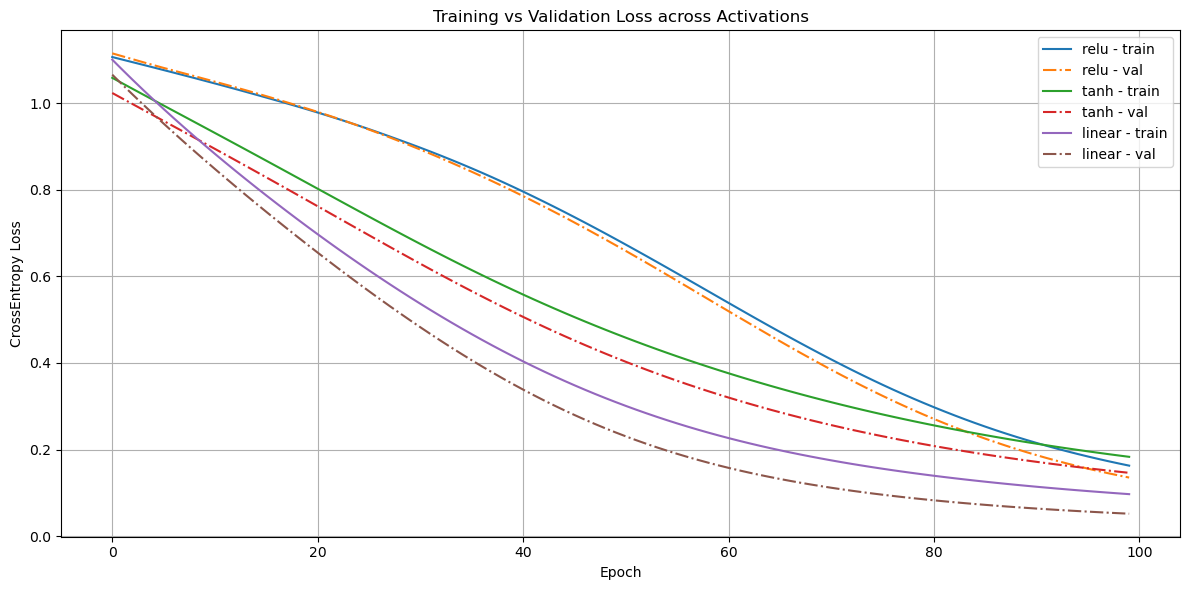

In [202]:
# 6) Plot loss curves for all activations (train and val on same chart)
plt.figure(figsize=(12, 6))
for act in activations:
    plt.plot(results[act]["hist"]["loss"],     label=f"{act} - train")
    plt.plot(results[act]["hist"]["val_loss"], label=f"{act} - val", linestyle="-.")
plt.title("Training vs Validation Loss across Activations")
plt.xlabel("Epoch")
plt.ylabel("CrossEntropy Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [203]:
# Print summary metrics 
def print_summary_table(results, order=None):
    if order is None:
        order = list(results.keys())
    print("Summary of Results:")
    print("--------------------------------------------------")
    print(f"{'Activation':<10} {'Test Accuracy':>14}   {'Test Loss':>9}")
    print("--------------------------------------------------")
    for act in order:
        acc   = results[act]["metrics"]["accuracy"]
        tloss = results[act]["metrics"]["test_loss"]
        print(f"{act:<10} {acc:>14.4f}   {tloss:>9.4f}")

print_summary_table(results) 

Summary of Results:
--------------------------------------------------
Activation  Test Accuracy   Test Loss
--------------------------------------------------
relu               1.0000      0.1354
tanh               1.0000      0.1463
linear             1.0000      0.0519


#### Tuning Model

In [210]:
# Activation Getter
def get_activation(name: str) -> nn.Module:
    name = name.lower()
    if name == "relu":    return nn.ReLU()
    if name == "tanh":    return nn.Tanh()
    if name == "linear":  return nn.Identity()  # no nonlinearity
    if name == "sigmoid": return nn.Sigmoid() # Added Sigmoid for a common example
    raise ValueError(f"Unknown activation: {name}")

# --- 2. Model Definition (modified with Dropout) ---
class WineClassifierExp(nn.Module):
    def __init__(self, in_features: int, hidden_layers: list, num_classes: int, dropout_rate: float, activation: str):
        super().__init__()
        
        layers = []
        prev_h = in_features
        
        # Build the sequential layers based on the 'hidden_layers' list
        for h in hidden_layers:
            layers.append(nn.Linear(prev_h, h))
            layers.append(nn.ReLU())
            # Add Dropout layer after ReLU
            layers.append(nn.Dropout(dropout_rate)) 
            prev_h = h
            
        # Output layer
        layers.append(nn.Linear(prev_h, num_classes)) 
        
        self.net = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.net(x)

# --- 3. Training and Evaluation Function ---

def train_and_evaluate(
    hidden_layers: list, 
    dropout_rate: float, 
    activation: str,
    learning_rate: float = 0.001, 
    num_epochs: int = 100,
    patience: int = 10,  # <-- New Parameter: How long to wait
    min_delta: float = 0.0001 # <-- New Parameter: Minimum improvement required
) -> dict:
    """Trains and evaluates the model for a given set of hyperparameters, including activation."""
    
    # 1. Initialize Model, Loss, and Optimizer
    model = WineClassifierExp(
        in_features=X_train_tensor.shape[1], 
        hidden_layers=hidden_layers, 
        num_classes=3, 
        dropout_rate=dropout_rate,
        activation=activation
    )
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Early Stopping Variables
    best_val_loss = float('inf')
    epochs_no_improve = 0
    final_epoch = num_epochs

    # 2. Training Loop with Early Stopping Logic
    for epoch in range(num_epochs):
        model.train()
        # Training Step (same as before)
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor) 
        loss.backward()
        optimizer.step()
        
        # Validation Step
        model.eval()
        with torch.no_grad():
            outputs_val = model(X_test_tensor)
            val_loss = criterion(outputs_val, y_test_tensor).item()
        
        # Early Stopping Check
        if val_loss < best_val_loss - min_delta:
            # Improvement found: Reset counter and update best loss
            best_val_loss = val_loss
            epochs_no_improve = 0
            # Save the currently best model state (weights)
            best_model_state = model.state_dict() 
        else:
            # No significant improvement: Increment counter
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"    *** Early stopped at Epoch {epoch + 1} ***")
            final_epoch = epoch + 1
            break

    # 3. Load the best model weights found during training
    if 'best_model_state' in locals():
        model.load_state_dict(best_model_state)
    
    # 4. Final Evaluation (using the best model state)
    model.eval()
    with torch.no_grad():
        outputs_test = model(X_test_tensor)
        test_loss = criterion(outputs_test, y_test_tensor).item()
        _, predicted = torch.max(outputs_test, 1)
        test_accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
        
    # 5. Return Results
    return {
        'accuracy': test_accuracy,
        'loss': test_loss,
        'epochs_run': final_epoch, # <-- Track how many epochs were run
        'params': {
            'hidden_layers': hidden_layers,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'activation': activation,
            'patience': patience
        }
    }

# --- 4. Hyperparameter Search Space ---

# The hyperparameters we want to tune
HIDDEN_LAYERS_CHOICES = [[32, 16, 8], [64, 32], [32, 16]]
DROPOUT_RATES = [0.1, 0.2, 0.3]
ACTIVATIONS = ["relu", "tanh", "sigmoid", "linear"]
NUM_RUNS_PER_COMBO = 5 # To account for random initialization variations
MAX_EPOCHS = 100 # Maximum epochs to run
PATIENCE = 10    # Patience for early stopping

# Store all results
all_results = []

# --- 5. Hyperparameter Training Loop ---
print("Starting Hyperparameter Training...")
for activation in ACTIVATIONS:
    for layers in HIDDEN_LAYERS_CHOICES:
        for dropout in DROPOUT_RATES:
            
            # Run the combination multiple times
            for run in range(1, NUM_RUNS_PER_COMBO + 1):
                
                # Train and evaluate
                result = train_and_evaluate(
                    hidden_layers=layers, 
                    dropout_rate=dropout,
                    activation=activation,
                    num_epochs=MAX_EPOCHS,
                    patience=PATIENCE
                )
                
                # Add run number for tracking
                result['run'] = run
                all_results.append(result)
                
                print(f"  Run {run}/{NUM_RUNS_PER_COMBO} | Act: {activation:<7}, Layers: {layers}, Dropout: {dropout:.1f} | Epochs Run: {result['epochs_run']} -> Acc: {result['accuracy']:.4f}, Loss: {result['loss']:.4f}")

print("Hyperparameter Training Complete.")

# --- 6. Results Summary ---

# Sort results: Best is highest accuracy, then lowest loss
all_results.sort(key=lambda x: (x['accuracy'], -x['loss']), reverse=True)

# Select the top 5
top_5_results = all_results[:5]

# --- Results Summary ---
all_results.sort(key=lambda x: (x['accuracy'], -x['loss']), reverse=True)
top_5_results = all_results[:5]

print("\n--- Top 5 Best Hyperparameter Combinations (with Activation) ---")
print("| Rank | Activation | Hidden Layers | Dropout | Test Accuracy | Test Loss | Epochs Run | Run |")
print("|------|------------|---------------|---------|---------------|-----------|------------|-----|")
for i, res in enumerate(top_5_results, 1):
    params = res['params']
    layers_str = str(params['hidden_layers']).replace(' ', '')
    print(f"| {i:<4} | {params['activation']:<10} | {layers_str:<13} | {params['dropout_rate']:<7.1f} | {res['accuracy']:.4f}      | {res['loss']:.4f}  | {res['epochs_run']:<10} | {res['run']} |")

Starting Hyperparameter Training...
  Run 1/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.1 | Epochs Run: 100 -> Acc: 1.0000, Loss: 0.2777
  Run 2/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.1 | Epochs Run: 100 -> Acc: 0.9444, Loss: 0.3884
  Run 3/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.1 | Epochs Run: 100 -> Acc: 1.0000, Loss: 0.1617
  Run 4/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.1 | Epochs Run: 100 -> Acc: 1.0000, Loss: 0.3399
  Run 5/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.1 | Epochs Run: 100 -> Acc: 1.0000, Loss: 0.3624
  Run 1/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.2 | Epochs Run: 100 -> Acc: 1.0000, Loss: 0.2368
  Run 2/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.2 | Epochs Run: 100 -> Acc: 1.0000, Loss: 0.4677
  Run 3/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.2 | Epochs Run: 100 -> Acc: 1.0000, Loss: 0.3013
  Run 4/5 | Act: relu   , Layers: [32, 16, 8], Dropout: 0.2 | Epochs Run: 100 -> Acc: 0.9722, Loss: 0.3362
 

#### Trained Best Model


--- Training Final Model with Best Params: Act=linear, Layers=[64, 32] ---
Epoch [50/200], Train Loss: 0.2432, Validation Loss: 0.2255
Epoch [100/200], Train Loss: 0.0411, Validation Loss: 0.0358
Epoch [150/200], Train Loss: 0.0183, Validation Loss: 0.0176
Epoch [200/200], Train Loss: 0.0098, Validation Loss: 0.0120

--- Final Test Set Evaluation ---
Test Accuracy: 1.0000

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



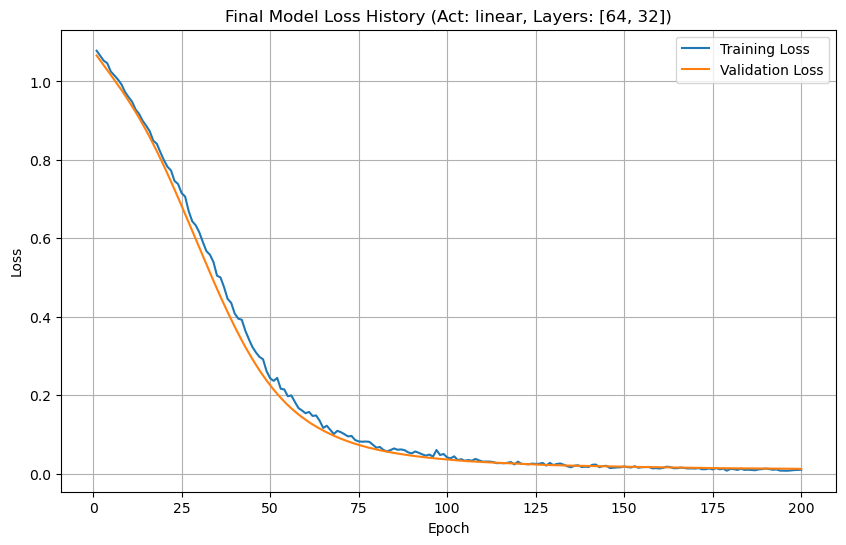

In [218]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

class WineClassifierExp(nn.Module):
    def __init__(self, in_features: int, hidden_layers: list, num_classes: int, dropout_rate: float, activation: str):
        super().__init__()
        
        layers = []
        prev_h = in_features
        
        # Build the sequential layers based on the 'hidden_layers' list
        for h in hidden_layers:
            layers.append(nn.Linear(prev_h, h))
            layers.append(nn.ReLU())
            # Add Dropout layer after ReLU
            layers.append(nn.Dropout(dropout_rate)) 
            prev_h = h
            
        # Output layer
        layers.append(nn.Linear(prev_h, num_classes)) 
        
        self.net = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.net(x)
    
# --- 1. Define Best Parameters (based on your hyperparameter search results) ---
# NOTE: Replace these with the actual values from your search's top result!
BEST_ACTIVATION = "linear"
BEST_HIDDEN_LAYERS = [64, 32]
BEST_DROPOUT_RATE = 0.1
FINAL_LEARNING_RATE = 0.001
MAX_EPOCHS_FINAL = 200 # Use a slightly higher max, relying on early stopping
FINAL_PATIENCE = 20    # Can slightly increase patience for the final run

# Assuming WineClassifier, get_activation, X/y tensors, IN_FEATURES, and NUM_CLASSES are defined

# --- 2. Final Training Function  ---

def train_final_model(
    hidden_layers: list, 
    dropout_rate: float, 
    activation: str,
    lr: float,
    num_epochs: int,
    patience: int
):
    # Initialize Model, Loss, and Optimizer
    final_model = WineClassifierExp(
        in_features=X_train_tensor.shape[1], 
        hidden_layers=hidden_layers, 
        num_classes=3, 
        dropout_rate=dropout_rate,
        activation=activation
    )
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(final_model.parameters(), lr=lr)

    # Early Stopping Variables
    best_val_loss = float('inf')
    epochs_no_improve = 0
    history = {'train_loss': [], 'val_loss': []}

    # Training Loop
    for epoch in range(num_epochs):
        final_model.train()
        
        optimizer.zero_grad()
        outputs = final_model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor) 
        loss.backward()
        optimizer.step()
        history['train_loss'].append(loss.item())

        final_model.eval()
        with torch.no_grad():
            outputs_val = final_model(X_test_tensor)
            val_loss = criterion(outputs_val, y_test_tensor).item()
            history['val_loss'].append(val_loss)
        
        # Early Stopping Logic (same as before)
        min_delta = 0.0001 # Retain min_delta
        if val_loss < best_val_loss - min_delta:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = final_model.state_dict() # Save best state
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"\n*** Early stopped at Epoch {epoch + 1} ***")
            break
            
        if (epoch+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}')

    # Load the best model weights found during training
    if 'best_model_state' in locals():
        final_model.load_state_dict(best_model_state)

    return final_model, history

# --- 3. Run Final Training and Evaluation ---
print(f"\n--- Training Final Model with Best Params: Act={BEST_ACTIVATION}, Layers={BEST_HIDDEN_LAYERS} ---")
final_model, history = train_final_model(
    hidden_layers=BEST_HIDDEN_LAYERS,
    dropout_rate=BEST_DROPOUT_RATE,
    activation=BEST_ACTIVATION,
    lr=FINAL_LEARNING_RATE,
    num_epochs=MAX_EPOCHS_FINAL,
    patience=FINAL_PATIENCE
)

# --- 4. Final Evaluation on Test Set ---
final_model.eval()
with torch.no_grad():
    outputs_test = final_model(X_test_tensor)
    _, predicted = torch.max(outputs_test, 1)
    
    # Calculate metrics
    y_true_numpy = y_test_tensor.numpy()
    predicted_numpy = predicted.numpy()
    
    accuracy = accuracy_score(y_true_numpy, predicted_numpy)
    conf_matrix = confusion_matrix(y_true_numpy, predicted_numpy)

print('\n--- Final Test Set Evaluation ---')
print(f'Test Accuracy: {accuracy:.4f}')

print('\nConfusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')
print(classification_report(y_true_numpy, predicted_numpy, target_names=wine.target_names))

# --- 5. Plotting Final History ---
epochs_list = range(1, len(history['train_loss']) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs_list, history['train_loss'], label='Training Loss')
plt.plot(epochs_list, history['val_loss'], label='Validation Loss')
plt.title(f'Final Model Loss History (Act: {BEST_ACTIVATION}, Layers: {BEST_HIDDEN_LAYERS})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [220]:
# Save the model
torch.save(final_model.state_dict(), 'wine_classifier1.pth')
print("Model saved to 'wine_classifier1.pth'")

# Example of using the model for prediction
def predict_wine(features):
    # Scale the features using the same scaler
    scaled_features = scaler.transform([features])

    # Convert to tensor
    features_tensor = torch.FloatTensor(scaled_features)

    # Get prediction
    model.eval()
    with torch.no_grad():
        outputs = final_model(features_tensor)
        _, predicted = torch.max(outputs, 1)

    return wine.target_names[predicted.item()]

# Example usage:
sample_features = X_test[0]  # Using the first test sample
predicted_wine = predict_wine(sample_features)
actual_wine = wine.target_names[y_test[0]]

print(f"Sample features: {sample_features}")
print(f"Predicted wine type: {predicted_wine}")
print(f"Actual wine type: {actual_wine}")

Model saved to 'wine_classifier1.pth'
Sample features: [1.364e+01 3.100e+00 2.560e+00 1.520e+01 1.160e+02 2.700e+00 3.030e+00
 1.700e-01 1.660e+00 5.100e+00 9.600e-01 3.360e+00 8.450e+02]
Predicted wine type: class_0
Actual wine type: class_0


### Another Method - tuning

In [136]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Print dataset information
print("Dataset Shape:", X.shape)
print("Number of Classes:", len(np.unique(y)))
print("Features:", wine.feature_names)

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

print("\nTraining set shape:", X_train_tensor.shape)
print("Test set shape:", X_test_tensor.shape)

Dataset Shape: (178, 13)
Number of Classes: 3
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Training set shape: torch.Size([142, 13])
Test set shape: torch.Size([36, 13])


In [137]:
class WineClassifier(nn.Module):
    def __init__(self, input_size=13, hidden_size1=64, hidden_size2=32, num_classes=3):
        super(WineClassifier, self).__init__()
        
        # First hidden layer
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        
        # Second hidden layer
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        
        # Output layer
        self.output = nn.Linear(hidden_size2, num_classes)
        
    def forward(self, x):
        # Forward pass through the network
        x = self.dropout1(self.relu1(self.hidden1(x)))
        x = self.dropout2(self.relu2(self.hidden2(x)))
        x = self.output(x)
        return x

# Initialize the model
model = WineClassifier()
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

WineClassifier(
  (hidden1): Linear(in_features=13, out_features=64, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (output): Linear(in_features=32, out_features=3, bias=True)
)


In [138]:
# Function to calculate accuracy
def calculate_accuracy(y_pred, y_true):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y_true).sum().item()
    accuracy = correct / y_true.size(0)
    return accuracy

# Training function
def train_model(model, X_train, y_train, X_val, y_val, epochs=100, patience=10):
    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    # Early stopping variables
    best_val_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        train_accuracy = calculate_accuracy(outputs, y_train)
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_accuracy = calculate_accuracy(val_outputs, y_val)
        
        # Store metrics
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}]:')
            print(f'Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}')
            print(f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f'\nEarly stopping at epoch {epoch+1}')
            break
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Function to plot training history
def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot losses
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_title('Loss vs. Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # Plot accuracies
    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_title('Accuracy vs. Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

Epoch [10/100]:
Train Loss: 0.9675, Train Accuracy: 0.7254
Val Loss: 0.9411, Val Accuracy: 0.8611
Epoch [20/100]:
Train Loss: 0.7861, Train Accuracy: 0.9014
Val Loss: 0.7733, Val Accuracy: 0.9444
Epoch [30/100]:
Train Loss: 0.6673, Train Accuracy: 0.8732
Val Loss: 0.5767, Val Accuracy: 0.9722
Epoch [40/100]:
Train Loss: 0.4693, Train Accuracy: 0.9577
Val Loss: 0.3895, Val Accuracy: 0.9444
Epoch [50/100]:
Train Loss: 0.3402, Train Accuracy: 0.9507
Val Loss: 0.2442, Val Accuracy: 1.0000
Epoch [60/100]:
Train Loss: 0.2161, Train Accuracy: 0.9648
Val Loss: 0.1489, Val Accuracy: 1.0000
Epoch [70/100]:
Train Loss: 0.1639, Train Accuracy: 0.9577
Val Loss: 0.0925, Val Accuracy: 1.0000
Epoch [80/100]:
Train Loss: 0.1355, Train Accuracy: 0.9718
Val Loss: 0.0613, Val Accuracy: 1.0000
Epoch [90/100]:
Train Loss: 0.0998, Train Accuracy: 0.9789
Val Loss: 0.0425, Val Accuracy: 1.0000
Epoch [100/100]:
Train Loss: 0.0847, Train Accuracy: 0.9789
Val Loss: 0.0310, Val Accuracy: 1.0000


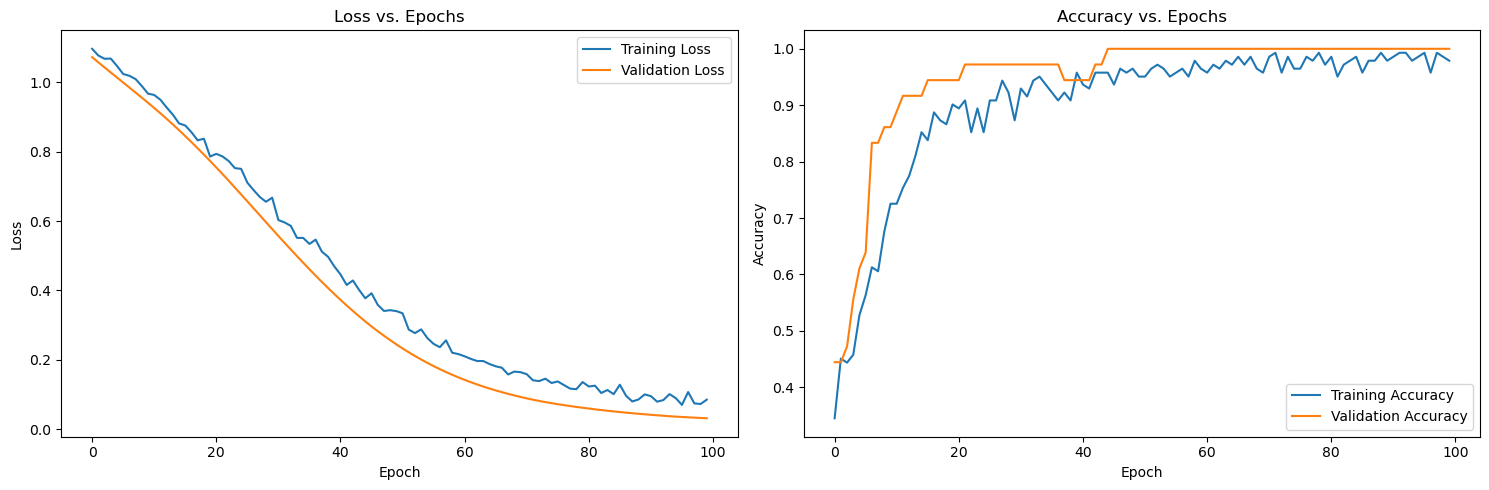

In [139]:
# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor
)

# Plot training history
plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)


Test Accuracy: 1.0000


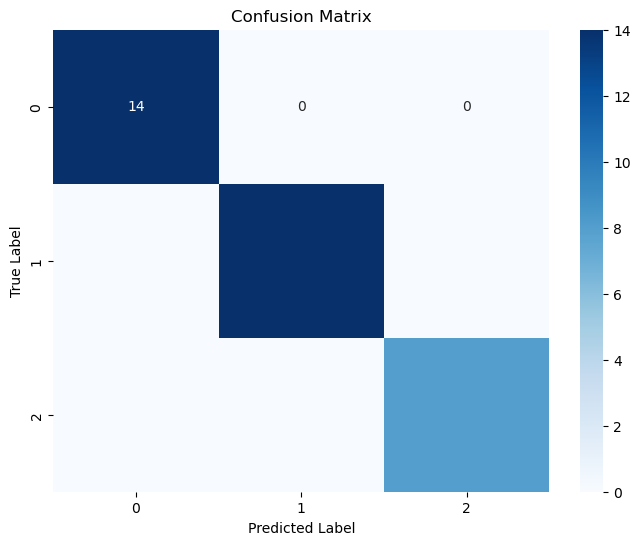


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [140]:
# Evaluate the model
model.eval()
with torch.no_grad():
    # Get predictions
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs.data, 1)
    
    # Calculate accuracy
    test_accuracy = calculate_accuracy(test_outputs, y_test_tensor)
    print(f'\nTest Accuracy: {test_accuracy:.4f}')
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test_tensor.numpy(), predicted.numpy())
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Print classification report
    print('\nClassification Report:')
    print(classification_report(y_test_tensor.numpy(), predicted.numpy(),
                              target_names=wine.target_names))

In [141]:
# Function to create and train model with different hyperparameters
def experiment_hyperparameters(hidden_sizes, learning_rate, dropout_rate):
    # Create model with specified architecture
    class ExperimentalModel(nn.Module):
        def __init__(self):
            super(ExperimentalModel, self).__init__()
            
            layers = []
            in_features = 13  # Input size
            
            # Add hidden layers
            for hidden_size in hidden_sizes:
                layers.append(nn.Linear(in_features, hidden_size))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(dropout_rate))
                in_features = hidden_size
            
            # Add output layer
            layers.append(nn.Linear(in_features, 3))
            
            self.model = nn.Sequential(*layers)
            
        def forward(self, x):
            return self.model(x)
    
    # Initialize model and optimizer
    model = ExperimentalModel()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Train and evaluate
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
        epochs=100, patience=10
    )
    
    # Get final test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_accuracy = calculate_accuracy(test_outputs, y_test_tensor)
    
    return test_accuracy, model

# Experiment with different architectures
architectures = [
    {'hidden_sizes': [32, 16], 'lr': 0.001, 'dropout': 0.2},
    {'hidden_sizes': [64, 32], 'lr': 0.001, 'dropout': 0.3},
    {'hidden_sizes': [128, 64, 32], 'lr': 0.001, 'dropout': 0.4},
]

results = []
for i, params in enumerate(architectures):
    print(f"\nExperiment {i+1}:")
    print(f"Architecture: {params['hidden_sizes']}")
    print(f"Learning rate: {params['lr']}")
    print(f"Dropout rate: {params['dropout']}")
    
    accuracy, model = experiment_hyperparameters(
        params['hidden_sizes'],
        params['lr'],
        params['dropout']
    )
    
    results.append({
        'architecture': str(params['hidden_sizes']),
        'accuracy': accuracy
    })
    print(f"Test Accuracy: {accuracy:.4f}")

# Print summary of results
print("\nSummary of Results:")
for result in results:
    print(f"Architecture: {result['architecture']}, Accuracy: {result['accuracy']:.4f}")


Experiment 1:
Architecture: [32, 16]
Learning rate: 0.001
Dropout rate: 0.2
Epoch [10/100]:
Train Loss: 1.0910, Train Accuracy: 0.4718
Val Loss: 1.0949, Val Accuracy: 0.5000

Early stopping at epoch 11
Test Accuracy: 0.5000

Experiment 2:
Architecture: [64, 32]
Learning rate: 0.001
Dropout rate: 0.3
Epoch [10/100]:
Train Loss: 1.1206, Train Accuracy: 0.3662
Val Loss: 1.0990, Val Accuracy: 0.4167

Early stopping at epoch 11
Test Accuracy: 0.4167

Experiment 3:
Architecture: [128, 64, 32]
Learning rate: 0.001
Dropout rate: 0.4
Epoch [10/100]:
Train Loss: 1.1048, Train Accuracy: 0.2887
Val Loss: 1.0981, Val Accuracy: 0.3056

Early stopping at epoch 11
Test Accuracy: 0.3056

Summary of Results:
Architecture: [32, 16], Accuracy: 0.5000
Architecture: [64, 32], Accuracy: 0.4167
Architecture: [128, 64, 32], Accuracy: 0.3056



Training model with relu activation...
Epoch [10/100]:
Train Loss: 1.0939, Train Accuracy: 0.2817
Val Loss: 1.1019, Val Accuracy: 0.2500

Early stopping at epoch 11
Test Accuracy: 0.2500
Test Loss: 1.1019

Training model with tanh activation...
Epoch [10/100]:
Train Loss: 1.1551, Train Accuracy: 0.2113
Val Loss: 1.1706, Val Accuracy: 0.0278

Early stopping at epoch 11
Test Accuracy: 0.0278
Test Loss: 1.1706

Training model with linear activation...
Epoch [10/100]:
Train Loss: 1.0616, Train Accuracy: 0.4859
Val Loss: 1.0074, Val Accuracy: 0.7222

Early stopping at epoch 11
Test Accuracy: 0.7222
Test Loss: 1.0074


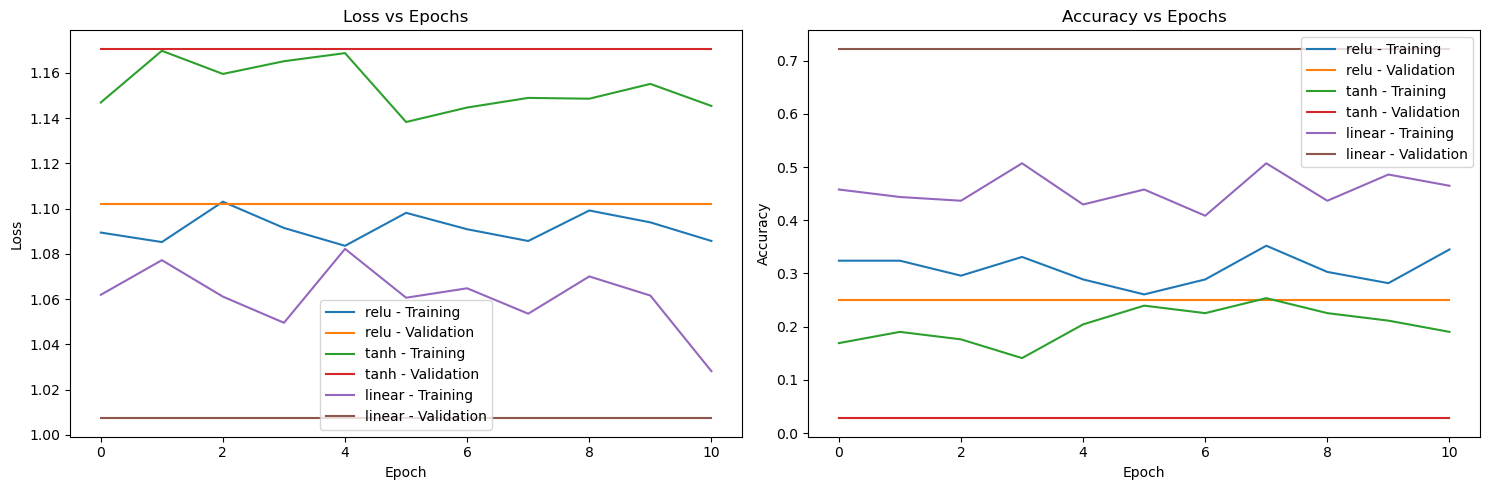


Summary of Results:
--------------------------------------------------
Activation Test Accuracy   Test Loss 
--------------------------------------------------
relu       0.2500         1.1019
tanh       0.0278         1.1706
linear     0.7222         1.0074


In [142]:
# Define models with different activation functions
class WineClassifierWithActivation(nn.Module):
    def __init__(self, activation_function):
        super(WineClassifierWithActivation, self).__init__()
        self.hidden1 = nn.Linear(13, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 3)
        self.dropout = nn.Dropout(0.3)
        
        # Set activation function
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        else:  # linear
            self.activation = nn.Identity()
            
    def forward(self, x):
        x = self.dropout(self.activation(self.hidden1(x)))
        x = self.dropout(self.activation(self.hidden2(x)))
        x = self.output(x)
        return x

# Function to train and evaluate model
def train_and_evaluate(activation_name):
    model = WineClassifierWithActivation(activation_name)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
        epochs=100, patience=10
    )
    
    # Evaluate
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_accuracy = calculate_accuracy(test_outputs, y_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        
    return {
        'activation': activation_name,
        'test_accuracy': test_accuracy,
        'test_loss': test_loss.item(),
        'train_history': {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        }
    }

# Compare different activation functions
activation_functions = ['relu', 'tanh', 'linear']
results = []

for activation in activation_functions:
    print(f"\nTraining model with {activation} activation...")
    result = train_and_evaluate(activation)
    results.append(result)
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Test Loss: {result['test_loss']:.4f}")

# Plot comparison
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
for result in results:
    plt.plot(result['train_history']['train_losses'], 
             label=f"{result['activation']} - Training")
    plt.plot(result['train_history']['val_losses'], 
             label=f"{result['activation']} - Validation")
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
for result in results:
    plt.plot(result['train_history']['train_accuracies'], 
             label=f"{result['activation']} - Training")
    plt.plot(result['train_history']['val_accuracies'], 
             label=f"{result['activation']} - Validation")
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary of Results:")
print("-" * 50)
print(f"{'Activation':<10} {'Test Accuracy':<15} {'Test Loss':<10}")
print("-" * 50)
for result in results:
    print(f"{result['activation']:<10} {result['test_accuracy']:.4f}{'':8} {result['test_loss']:.4f}")


Training models with relu activation...

Run 1/5 with relu activation
Epoch [10/150]:
Train Loss: 1.1182, Train Accuracy: 0.3944
Val Loss: 1.0789, Val Accuracy: 0.3056
Epoch [20/150]:
Train Loss: 1.0913, Train Accuracy: 0.4577
Val Loss: 1.0705, Val Accuracy: 0.4444
Epoch [30/150]:
Train Loss: 1.0955, Train Accuracy: 0.3944
Val Loss: 1.0705, Val Accuracy: 0.5278

Early stopping at epoch 39
Run 1 Test Accuracy: 0.5278
Run 1 Test Loss: 1.0717

Run 2/5 with relu activation
Epoch [10/150]:
Train Loss: 1.1081, Train Accuracy: 0.3662
Val Loss: 1.0944, Val Accuracy: 0.3611
Epoch [20/150]:
Train Loss: 1.1278, Train Accuracy: 0.3028
Val Loss: 1.0935, Val Accuracy: 0.3611
Epoch [30/150]:
Train Loss: 1.0934, Train Accuracy: 0.3662
Val Loss: 1.0929, Val Accuracy: 0.3333
Epoch [40/150]:
Train Loss: 1.1213, Train Accuracy: 0.3310
Val Loss: 1.0917, Val Accuracy: 0.3333
Epoch [50/150]:
Train Loss: 1.1073, Train Accuracy: 0.3521
Val Loss: 1.0918, Val Accuracy: 0.3333
Epoch [60/150]:
Train Loss: 1.1099,

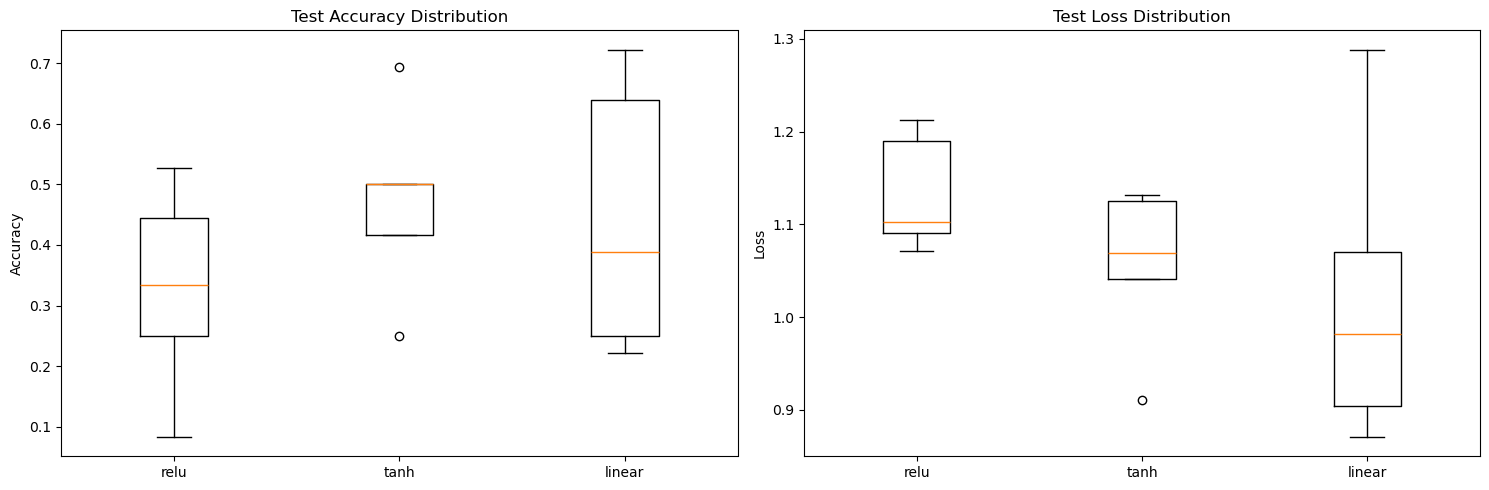

In [143]:
# Improved model with batch normalization
class ImprovedWineClassifier(nn.Module):
    def __init__(self, activation_function):
        super(ImprovedWineClassifier, self).__init__()
        
        # First hidden layer
        self.hidden1 = nn.Linear(13, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.2)  # Reduced dropout rate
        
        # Second hidden layer
        self.hidden2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.2)
        
        # Output layer
        self.output = nn.Linear(32, 3)
        
        # Set activation function
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        else:  # linear
            self.activation = nn.Identity()
            
    def forward(self, x):
        x = self.hidden1(x)
        x = self.bn1(x)
        x = self.activation(x)
        x = self.dropout1(x)
        
        x = self.hidden2(x)
        x = self.bn2(x)
        x = self.activation(x)
        x = self.dropout2(x)
        
        x = self.output(x)
        return x

# Function to train and evaluate with multiple runs
def train_multiple_runs(activation_name, n_runs=5):
    results = []
    
    for run in range(n_runs):
        print(f"\nRun {run+1}/{n_runs} with {activation_name} activation")
        
        # Initialize model and optimizer
        model = ImprovedWineClassifier(activation_name)
        optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Reduced learning rate
        
        # Train
        train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
            epochs=150,  # Increased epochs
            patience=15  # Increased patience
        )
        
        # Evaluate
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_accuracy = calculate_accuracy(test_outputs, y_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
        
        results.append({
            'run': run + 1,
            'test_accuracy': test_accuracy,
            'test_loss': test_loss.item(),
            'train_history': {
                'train_losses': train_losses,
                'val_losses': val_losses,
                'train_accuracies': train_accuracies,
                'val_accuracies': val_accuracies
            }
        })
        
        print(f"Run {run+1} Test Accuracy: {test_accuracy:.4f}")
        print(f"Run {run+1} Test Loss: {test_loss:.4f}")
    
    return results

# Compare different activation functions with multiple runs
activation_functions = ['relu', 'tanh', 'linear']
all_results = {}

for activation in activation_functions:
    print(f"\nTraining models with {activation} activation...")
    all_results[activation] = train_multiple_runs(activation)

# Calculate and print average results
print("\nAverage Results Across 5 Runs:")
print("-" * 60)
print(f"{'Activation':<10} {'Mean Accuracy':<15} {'Std Accuracy':<15} {'Mean Loss':<10}")
print("-" * 60)

for activation in activation_functions:
    accuracies = [r['test_accuracy'] for r in all_results[activation]]
    losses = [r['test_loss'] for r in all_results[activation]]
    
    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)
    mean_loss = np.mean(losses)
    
    print(f"{activation:<10} {mean_acc:.4f}{'':8} {std_acc:.4f}{'':8} {mean_loss:.4f}")

# Plot results
plt.figure(figsize=(15, 5))

# Box plot of accuracies
plt.subplot(1, 2, 1)
acc_data = [
    [r['test_accuracy'] for r in all_results[act]]
    for act in activation_functions
]
plt.boxplot(acc_data, labels=activation_functions)
plt.title('Test Accuracy Distribution')
plt.ylabel('Accuracy')

# Box plot of losses
plt.subplot(1, 2, 2)
loss_data = [
    [r['test_loss'] for r in all_results[act]]
    for act in activation_functions
]
plt.boxplot(loss_data, labels=activation_functions)
plt.title('Test Loss Distribution')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

## Submission

- Submit the URL of the GitHub Repository that contains your work to NTU black board.
- Should you reference the work of your classmate(s) or online resources, give them credit by adding either the name of your classmate or URL.